# Run test image in loop and show center line

In [1]:
from PIL import Image, ImageDraw
import numpy as np
from IPython.display import display
from pynq import Xlnk
from pynq import Overlay
import math # for atan2

## Download the Moments IP bitstream

In [2]:
moments_design = Overlay("../bitstream/moments.bit")
#moments_design?
dma = moments_design.axi_dma_0
moments = moments_design.moments_0

## Load image and prepare buffer

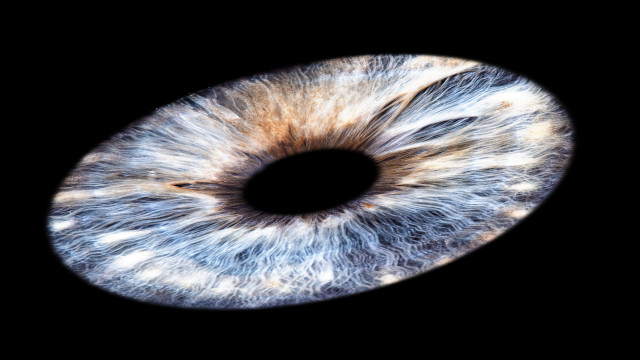

Image size: 640x360 pixels.


In [11]:
image_path = "simu_img/eye1.jpg"
original_image = Image.open(image_path)
original_image.load()
display(original_image)
old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))
new_width = int(old_width/2)
new_height = int(old_height/2)
xlnk = Xlnk()
in_buffer = xlnk.cma_array(shape=(old_height, old_width, 3), 
                           dtype=np.uint8, cacheable=1)
out_buffer = xlnk.cma_array(shape=(new_height, new_width, 3), 
                            dtype=np.uint8, cacheable=1)

## Loop over all image in folder: Size 640x360 color or gray (jpg, png)

Return angle components: angle x comp: 1899 angle y comp: -1177
Return values of moments: x: 176 y: 176 angleDEG: -15.90°
Image has also been resized in Hardware(PL): 320x180 pixels.


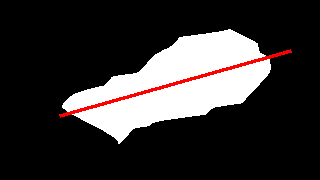

Return angle components: angle x comp: 2419 angle y comp: -513
Return values of moments: x: 165 y: 165 angleDEG: -5.99°
Image has also been resized in Hardware(PL): 320x180 pixels.


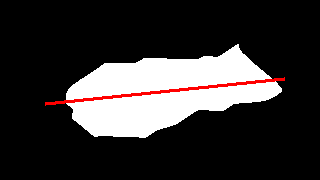

Return angle components: angle x comp: 2807 angle y comp: 940
Return values of moments: x: 164 y: 164 angleDEG: 9.26°
Image has also been resized in Hardware(PL): 320x180 pixels.


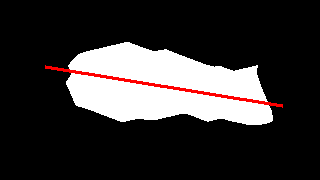

Return angle components: angle x comp: 6278 angle y comp: 6208
Return values of moments: x: 159 y: 159 angleDEG: 22.34°
Image has also been resized in Hardware(PL): 320x180 pixels.


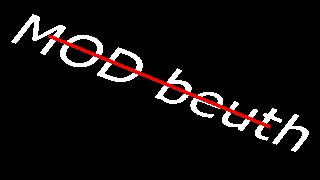

Return angle components: angle x comp: 2921 angle y comp: 2794
Return values of moments: x: 155 y: 155 angleDEG: 21.86°
Image has also been resized in Hardware(PL): 320x180 pixels.


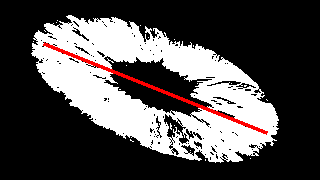

Return angle components: angle x comp: -543 angle y comp: -1039
Return values of moments: x: 138 y: 138 angleDEG: -58.80°
Image has also been resized in Hardware(PL): 320x180 pixels.


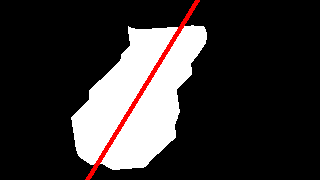

Return angle components: angle x comp: 3008 angle y comp: -145
Return values of moments: x: 177 y: 177 angleDEG: -1.38°
Image has also been resized in Hardware(PL): 320x180 pixels.


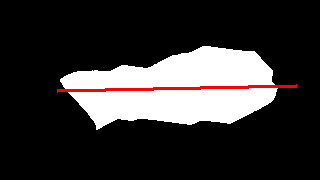

Return angle components: angle x comp: 2617 angle y comp: 422
Return values of moments: x: 164 y: 164 angleDEG: 4.58°
Image has also been resized in Hardware(PL): 320x180 pixels.


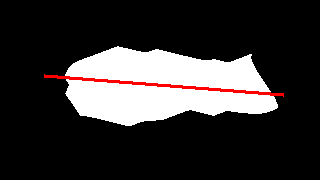

Return angle components: angle x comp: 2621 angle y comp: 1000
Return values of moments: x: 177 y: 177 angleDEG: 10.44°
Image has also been resized in Hardware(PL): 320x180 pixels.


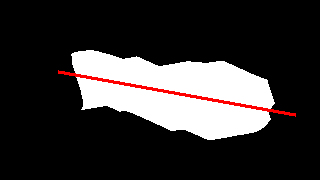

Return angle components: angle x comp: 1926 angle y comp: 1760
Return values of moments: x: 175 y: 175 angleDEG: 21.21°
Image has also been resized in Hardware(PL): 320x180 pixels.


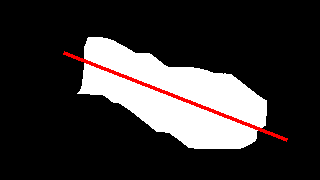

Return angle components: angle x comp: -54 angle y comp: -1443
Return values of moments: x: 170 y: 170 angleDEG: -46.07°
Image has also been resized in Hardware(PL): 320x180 pixels.


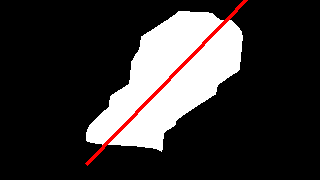

Return angle components: angle x comp: 6227 angle y comp: -5641
Return values of moments: x: 161 y: 161 angleDEG: -21.09°
Image has also been resized in Hardware(PL): 320x180 pixels.


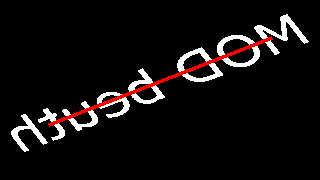

Return angle components: angle x comp: 1310 angle y comp: -3725
Return values of moments: x: 215 y: 215 angleDEG: -35.31°
Image has also been resized in Hardware(PL): 320x180 pixels.


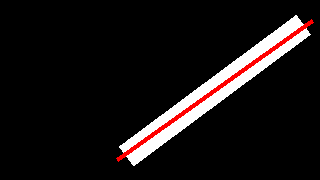

Return angle components: angle x comp: 3893 angle y comp: 3644
Return values of moments: x: 149 y: 149 angleDEG: 21.55°
Image has also been resized in Hardware(PL): 320x180 pixels.


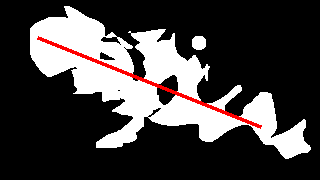

Return angle components: angle x comp: 3564 angle y comp: -1509
Return values of moments: x: 155 y: 155 angleDEG: -11.47°
Image has also been resized in Hardware(PL): 320x180 pixels.


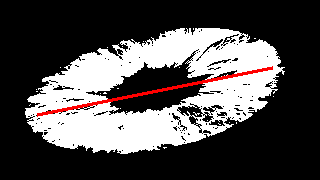

Return angle components: angle x comp: 1883 angle y comp: 1584
Return values of moments: x: 145 y: 145 angleDEG: 20.04°
Image has also been resized in Hardware(PL): 320x180 pixels.


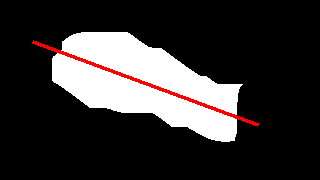

Return angle components: angle x comp: 187 angle y comp: 2084
Return values of moments: x: 171 y: 171 angleDEG: 42.44°
Image has also been resized in Hardware(PL): 320x180 pixels.


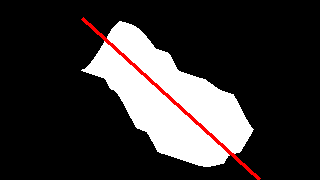

Return angle components: angle x comp: -898 angle y comp: -101
Return values of moments: x: 162 y: 162 angleDEG: -86.79°
Image has also been resized in Hardware(PL): 320x180 pixels.


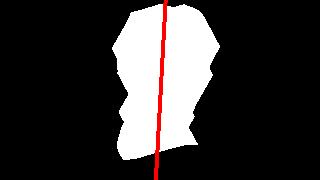

Return angle components: angle x comp: 4497 angle y comp: 2472
Return values of moments: x: 182 y: 182 angleDEG: 14.40°
Image has also been resized in Hardware(PL): 320x180 pixels.


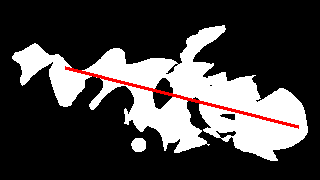

Return angle components: angle x comp: -232 angle y comp: 1874
Return values of moments: x: 152 y: 152 angleDEG: 48.53°
Image has also been resized in Hardware(PL): 320x180 pixels.


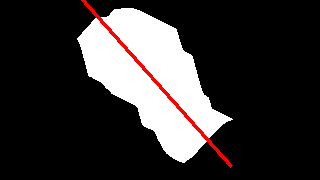

Return angle components: angle x comp: -538 angle y comp: 1218
Return values of moments: x: 149 y: 149 angleDEG: 56.92°
Image has also been resized in Hardware(PL): 320x180 pixels.


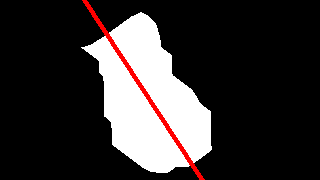

Return angle components: angle x comp: 1639 angle y comp: -1377
Return values of moments: x: 167 y: 167 angleDEG: -20.02°
Image has also been resized in Hardware(PL): 320x180 pixels.


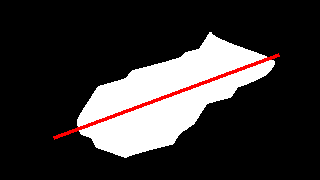

Return angle components: angle x comp: 772 angle y comp: 2212
Return values of moments: x: 148 y: 148 angleDEG: 35.38°
Image has also been resized in Hardware(PL): 320x180 pixels.


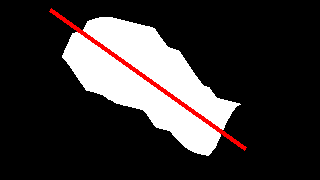

In [12]:
import glob
# run loop to load images
for img in glob.glob("simu_img/*"):
    original_image = Image.open(img)
    original_image.load()
    input_array = np.array(original_image)

    if (len(input_array.shape)==2):
        # if single channel create rgb image 3channels
        h,w = input_array.shape
        rgbArray = np.zeros((h,w,3), 'uint8')
        rgbArray[:,:, 0] = input_array
        rgbArray[:,:, 1] = input_array
        rgbArray[:,:, 2] = input_array    
        in_buffer[0:640*360*3] = rgbArray     
    else:
        in_buffer[0:640*360*3] = input_array

    buf_image = Image.fromarray(in_buffer)

    for i in range(2):
        moments.write(0x10, 13)
        x = moments.read(0x18)
        y = moments.read(0x20)
        anglex = moments.read(0x28)
        angley = moments.read(0x30)

        def run_kernel():
            dma.sendchannel.transfer(in_buffer)
            dma.recvchannel.transfer(out_buffer)    
            moments.write(0x00,0x81) # start
            dma.sendchannel.wait()
            dma.recvchannel.wait()

        run_kernel()

        result = Image.fromarray(out_buffer)

        if  angley & 0x80000000:
            angley -= 4294967295
        if  anglex & 0x80000000:
            anglex -= 4294967295

        angleRAD = 0.5 * math.atan2(angley,anglex)

    print('Return angle components: angle x comp: {} angle y comp: {}'.format(anglex, angley))
    print('Return values of moments: x: {0:d} y: {0:d} angleDEG: {2:.2f}°'.format(x,y,180*angleRAD/3.1415972))
    print("Image has also been resized in Hardware(PL): {}x{} pixels.".format(new_width, new_height))
    ll = 120
    draw = ImageDraw.Draw(result)
    draw.line((x-ll*np.cos(-angleRAD),y+ll*np.sin(-angleRAD),x+ll*np.cos(-angleRAD),y-ll*np.sin(-angleRAD)), fill=255, width=4)
    del draw
    display(result)

In [13]:
xlnk.xlnk_reset()